### Analysis of human ribosome profiling dataset (Park et al. 2016; PMID: 27153541) using ribotricer

In [1]:
! STAR --runMode genomeGenerate \
 --runThreadN 32 \
--genomeFastaFiles ../ref/hg38/hg38.fa \
--sjdbGTFfile ../ref/hg38/gencode.v47.annotation.gtf \
--genomeDir ../ref/hg38/hg38_star_index

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode genomeGenerate --runThreadN 32 --genomeFastaFiles ../ref/hg38/hg38.fa --sjdbGTFfile ../ref/hg38/gencode.v47.annotation.gtf --genomeDir ../ref/hg38/hg38_star_index
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 04 10:37:27 ..... started STAR run
Feb 04 10:37:27 ... starting to generate Genome files
Feb 04 10:38:17 ..... processing annotations GTF
Feb 04 10:38:46 ... starting to sort Suffix Array. This may take a long time...
Feb 04 10:39:01 ... sorting Suffix Array chunks and saving them to disk...
Feb 04 10:51:36 ... loading chunks from disk, packing SA...
Feb 04 10:53:40 ... finished generating suffix array
Feb 04 10:53:40 ... generating Suffix Array index
Feb 04 10:56:50 ... completed Suffix Array index
Feb 04 10:56:50 ..... inserting junctions into the genome indices
Feb 04 10:59:32 ... writing Genome to disk ...
Feb 04 10:59:39 ... writing Suffix Arra

In [2]:
! for i in ../doc/park_2016_datasets/*/*.fastq.gz; do \
    STAR --runMode alignReads \
    --runThreadN 32 \
    --outFilterType BySJout --outFilterMismatchNmax 2 \
    --genomeDir ../ref/hg38/hg38_star_index \
    --readFilesIn ${i} --readFilesCommand zcat \
    --outFileNamePrefix ${i%%.*}_genomic_ \
    --clip3pAdapterSeq TGGAATTCTCGGGTGCC \
    --outSAMtype BAM SortedByCoordinate \
    --quantMode TranscriptomeSAM GeneCounts \
    --outFilterMultimapNmax 1 --outFilterMatchNmin 16 \
    --alignEndsType EndToEnd --outSAMattributes All; done

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --runThreadN 32 --outFilterType BySJout --outFilterMismatchNmax 2 --genomeDir ../ref/hg38/hg38_star_index --readFilesIn ../doc/park_2016_datasets/SRR3306581/SRR3306581.fastq.gz --readFilesCommand zcat --outFileNamePrefix ../doc/park_2016_datasets/SRR3306581/SRR3306581.fastq_genomic_ --clip3pAdapterSeq TGGAATTCTCGGGTGCC --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outFilterMultimapNmax 1 --outFilterMatchNmin 16 --alignEndsType EndToEnd --outSAMattributes All
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 04 11:09:35 ..... started STAR run
Feb 04 11:09:38 ..... loading genome
Feb 04 11:09:48 ..... started mapping
Feb 04 11:11:39 ..... finished mapping
Feb 04 11:11:41 ..... started sorting BAM
Feb 04 11:12:13 ..... finished successfully
	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --run

In [ ]:
! samtools merge \
../doc/park_2016_datasets/SRR3306588/SRR3306588_genomic_Aligned.sortedByCoord.out.bam \
../doc/park_2016_datasets/SRR3306589/SRR3306589_genomic_Aligned.sortedByCoord.out.bam \
-o ../doc/park_2016_datasets/SRR3306588_9_genomic.bam
! samtools merge \
../doc/park_2016_datasets/SRR3306581/SRR3306581_genomic_Aligned.sortedByCoord.out.bam \
../doc/park_2016_datasets/SRR3306582/SRR3306582_genomic_Aligned.sortedByCoord.out.bam \
-o ../doc/park_2016_datasets/SRR3306581_2_genomic.bam

! samtools sort ../doc/park_2016_datasets/SRR3306588_9_genomic.bam \
-o ../doc/park_2016_datasets/SRR3306588_9_genomic.sorted.bam
samtools sort ../doc/park_2016_datasets/SRR3306581_2_genomic.bam \
-o ../doc/park_2016_datasets/SRR3306581_2_genomic.sorted.bam

! mv ../doc/park_2016_datasets/SRR3306588_9_genomic.sorted.bam ../doc/park_2016_datasets/SRR3306588_9_genomic.bam
! mv ../doc/park_2016_datasets/SRR3306581_2_genomic.sorted.bam ../doc/park_2016_datasets/SRR3306581_2_genomic.bam

#### Run ribotricer using default settings (phase-score cutoff: 0.428)

In [ ]:
! ribotricer prepare-orfs \
--gtf ../ref/hg38/gencode.v47.annotation.gtf \
--fasta ../ref/hg38/hg38.fa \
--prefix ../ref/hg38/hg38

! for i in ../doc/park_2016_datasets/*_genomic.bam; do \
    ribotricer detect-orfs \
  --bam ${i} \
  --ribotricer_index ../ref/hg38/hg38_candidate_orfs.tsv \
  --prefix ../results/park_2016_datasets/ribotricer/"${i##*/}".ribotricer_; done

#### Run ribotricer using learn-cutoff and obtained recommended_cutoff: 0.592

In [ ]:
! ribotricer learn-cutoff \
--ribo_bams ../doc/park_2016_datasets/SRR3306588_9_genomic.bam \
--rna_bams ../doc/park_2016_datasets/SRR3306581_2_genomic.bam \
--prefix ../results/park_2016_datasets/ribotricer/learn-cutoff \
--ribotricer_index ../ref/hg38/hg38_candidate_orfs.tsv

# sampling_ratio: 0.33
# n_samples: 20000
# ribo_phase_score_mean: 0.682
# ribo_phase_score_median: 0.682
# ribo_phase_score_sd: 0.001
# rna_phase_score_mean: 0.090
# rna_phase_score_median: 0.090
# rna_phase_score_sd: 0.001
# diff_phase_score_sampled_mean: 0.592
# diff_phase_score_sampled_median: 0.592
# diff_phase_score_sampled_sd: 0.001
# diff_phase_score_all_mean: 0.400
# diff_phase_score_all_median: 0.526
# diff_phase_score_all_sd: 0.349
# recommended_cutoff: 0.592

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr

#### Distributions of phase scores

In [2]:
ribo_rt = pd.read_csv('../results/park_2016_datasets/ribotricer/SRR3306588_9_genomic.ribotricer__translating_ORFs.tsv', sep='\t')
ribo_rt = ribo_rt[ribo_rt.phase_score>0.592].copy()
ribo_rt.value_counts('ORF_type')

ORF_type
novel           252125
dORF            112772
annotated        59976
overlap_dORF     24733
overlap_uORF      4970
super_uORF        4117
uORF              3897
super_dORF        3646
Name: count, dtype: int64

In [3]:
rna_rt = pd.read_csv('../results/park_2016_datasets/ribotricer/SRR3306581_2_genomic.ribotricer__translating_ORFs.tsv', sep='\t')
rna_rt = rna_rt[rna_rt.phase_score>0.592].copy()
rna_rt.value_counts('ORF_type')

ORF_type
novel           11178
super_dORF       5202
dORF             4114
overlap_dORF     1115
annotated        1042
overlap_uORF      288
uORF              166
super_uORF        114
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'annotated'),
  Text(1, 0, 'novel'),
  Text(2, 0, 'super_dORF'),
  Text(3, 0, 'overlap_dORF'),
  Text(4, 0, 'dORF'),
  Text(5, 0, 'uORF'),
  Text(6, 0, 'overlap_uORF'),
  Text(7, 0, 'super_uORF')])

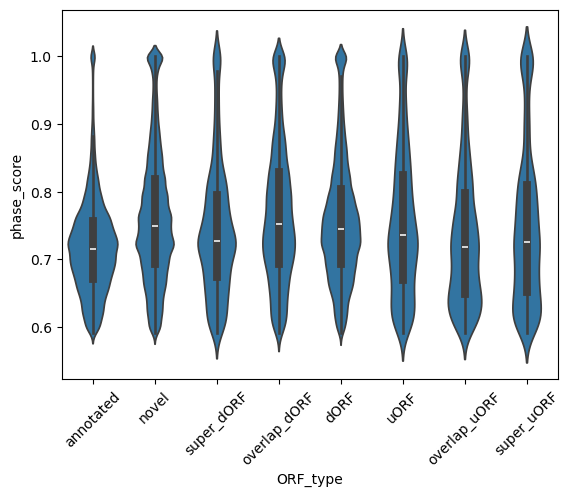

In [4]:
sns.violinplot(data=ribo_rt, x='ORF_type', y='phase_score')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'annotated'),
  Text(1, 0, 'novel'),
  Text(2, 0, 'overlap_dORF'),
  Text(3, 0, 'super_dORF'),
  Text(4, 0, 'overlap_uORF'),
  Text(5, 0, 'dORF'),
  Text(6, 0, 'uORF'),
  Text(7, 0, 'super_uORF')])

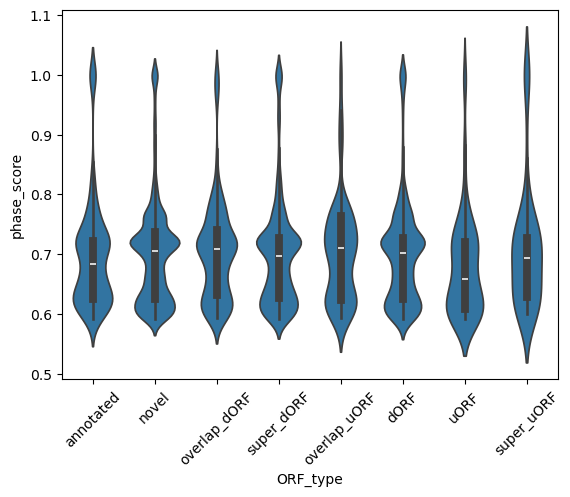

In [5]:
sns.violinplot(data=rna_rt, x='ORF_type', y='phase_score')
plt.xticks(rotation=45)

#### Count Ribo-Seq ORFs detected

In [4]:
norfs = pd.read_pickle('../doc/riboseqorfs/riboseqorfs.pkl.gz')
norfs.rename(columns={'chrm':'Chromosome','start':'Start','end':'End','strand':'Strand'}, inplace=True)
norfs_b = pr.PyRanges(norfs[['Chromosome','Start','End','Ribo-Seq_ORF','orf_length','Strand','orf_biotype']])

In [5]:
ribo_rt = ribo_rt[ribo_rt.ORF_type!='annotated'].copy()
ribo_rt[['tid','Start','End','length']] = ribo_rt.ORF_ID.str.split('_', expand=True)
ribo_rt['oid'] = ribo_rt.tid + '_' + ribo_rt['length'] + '_' + ribo_rt.ORF_type
ribo_rt['Start'] = ribo_rt.Start.astype(int) -1

ribo_rt = ribo_rt[['chrom','Start','End','oid','phase_score','strand']].rename(columns={'chrom':'Chromosome','strand':'Strand'})
ribo_rs = pr.PyRanges(ribo_rt)

ribo_rs = ribo_rs.join(norfs_b)
ribo_rs = ribo_rs[((ribo_rs.Start==ribo_rs.Start_b) | (ribo_rs.End==ribo_rs.End_b)) & (ribo_rs.Strand==ribo_rs.Strand_b)].df.copy()
ribo_rs = ribo_rs.drop_duplicates(['Chromosome','Start','End','phase_score','Strand'])

ribo_rt.shape[0], ribo_rs.shape[0]

(406260, 540)

In [6]:
rna_rt = rna_rt[rna_rt.ORF_type!='annotated'].copy()
rna_rt[['tid','Start','End','length']] = rna_rt.ORF_ID.str.split('_', expand=True)
rna_rt['oid'] = rna_rt.tid + '_' + rna_rt['length'] + '_' + rna_rt.ORF_type
rna_rt['Start'] = rna_rt.Start.astype(int) -1

rna_rt = rna_rt[['chrom','Start','End','oid','phase_score','strand']].rename(columns={'chrom':'Chromosome','strand':'Strand'})
rna_rs = pr.PyRanges(rna_rt)

rna_rs = rna_rs.join(norfs_b)
rna_rs = rna_rs[((rna_rs.Start==rna_rs.Start_b) | (rna_rs.End==rna_rs.End_b)) & (rna_rs.Strand==rna_rs.Strand_b)].df.copy()
rna_rs = rna_rs.drop_duplicates(['Chromosome','Start','End','phase_score','Strand'])

rna_rt.shape[0], rna_rs.shape[0]

(22177, 23)

#### Performance assessment

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr

##### Get ribotricer predicted ORFs for RNA-seq

In [13]:
rna_rt = pd.read_csv('../results/park_2016_datasets/ribotricer/SRR3306581_2_genomic.ribotricer__translating_ORFs.tsv', sep='\t')
rna_rt = rna_rt[rna_rt.phase_score>0.592].copy()
rna_rt['y_pred'] = 1
rna_rt.value_counts('ORF_type')

ORF_type
novel           11178
super_dORF       5202
dORF             4114
overlap_dORF     1115
annotated        1042
overlap_uORF      288
uORF              166
super_uORF        114
Name: count, dtype: int64

In [14]:
bperf = pd.read_pickle('../results/park_2016_datasets/riboss/boss_perf.pkl.gz')
bperf.drop('y_pred', axis=1, inplace=True)

rt_fp = pd.merge(bperf[~bperf.id.str.contains('riboseqorf')],rna_rt[['ORF_ID','y_pred']].rename(columns={'ORF_ID':'id'}))

of_rt_id = pd.read_csv('../ref/hg38/orf_finder_ribotricer.intersection.txt', sep='\t')
of_rt_id['y_true'] = -1
of_rt_id['y_pred'] =-1
of_rt_id.drop('oid', axis=1, inplace=True)
of_rt_id.columns = ['id','y_true','y_pred']

rtrna = pd.concat([rt_fp,of_rt_id]).drop_duplicates('id')
rtrna = pd.merge(bperf[['id']],rtrna)
rtrna.value_counts(['y_true','y_pred'])

y_true  y_pred
-1      -1        4656
         1         121
Name: count, dtype: int64

##### Get ribotricer predicted ORFs for ribosome profiling

In [15]:
rs_rt = pd.read_csv('../doc/riboseqorfs/riboseqorfs.ribotricer.txt', sep='\t', header=None)
rs_rt['ORF_ID'] = rs_rt[3].str.split('|').str[0] + '_' + rs_rt[1].astype(str) + '_' + rs_rt[2].astype(str) + '_' + rs_rt[4].astype(str)
rs_rt.rename(columns={9:'Ribo-Seq_ORF'}, inplace=True)

rs_rt['ORF_length'] = rs_rt[16].apply(lambda x: np.sum([int(i) for i in x.split(',')[:-1]]))
rs_rt = rs_rt[(rs_rt[4]+3)==rs_rt.ORF_length].copy()
rs_rt.drop_duplicates('Ribo-Seq_ORF').shape

(586, 21)

In [16]:
ribo_rt = pd.read_csv('../results/park_2016_datasets/ribotricer/SRR3306588_9_genomic.ribotricer__translating_ORFs.tsv', sep='\t')
ribo_rt = ribo_rt[ribo_rt.phase_score>0.592].copy()
ribo_rt.value_counts('ORF_type')

ORF_type
novel           252125
dORF            112772
annotated        59976
overlap_dORF     24733
overlap_uORF      4970
super_uORF        4117
uORF              3897
super_dORF        3646
Name: count, dtype: int64

In [17]:
rsi = pd.read_csv('../doc/riboseqorfs/riboseqorfs.intersection.txt')
rsi['y_true'] = 1
rtribo = pd.merge(rsi,rs_rt)[['Ribo-Seq_ORF','ORF_ID','y_true']].drop_duplicates().copy()

rtribo = pd.merge(rtribo,ribo_rt,on='ORF_ID')[['Ribo-Seq_ORF','y_true']].drop_duplicates()
rtribo['y_pred'] = 1
rtribo.columns = ['id','y_true','y_pred']

rtribo = pd.merge(bperf[~bperf.id.str.contains('ENS')],rtribo, how='left')
rtribo.fillna(-1, inplace=True)
rtribo['y_pred'] = rtribo.y_pred.astype(int)

rperf = pd.concat([rtribo,rtrna])
rperf.value_counts(['y_true','y_pred'])

y_true  y_pred
-1      -1        4656
         1         121
 1      -1          55
         1          39
Name: count, dtype: int64

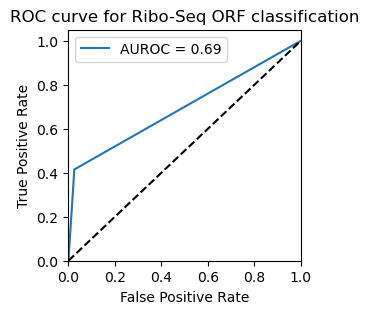

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef, f1_score


fpr, tpr, thresholds = roc_curve(rperf.y_true, rperf.y_pred) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))  
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ribo-Seq ORF classification')
plt.legend()

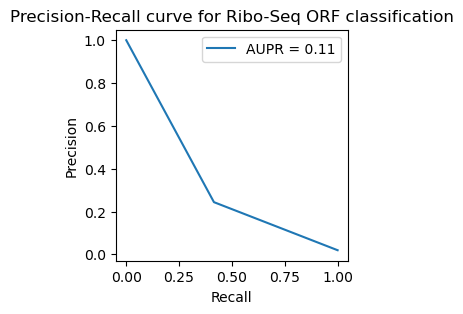

In [19]:
precision, recall, thresholds = precision_recall_curve(rperf.y_true, rperf.y_pred)
average_precision = average_precision_score(rperf.y_true, rperf.y_pred)

plt.figure(figsize=(3,3))
plt.plot(recall, precision, label='AUPR = %0.2f' % average_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve for Ribo-Seq ORF classification")
plt.legend()

In [20]:
matthews_corrcoef(rperf.y_true, rperf.y_pred)

0.3006794329696455

In [21]:
f1_score(rperf.y_true, rperf.y_pred)

0.30708661417322836